# BIG DATA ANALYTICS: Regression using DNN
- DNN에서 Regression 문제에 대해서는 어떻게 모델을 정의해야하는지 보겠습니다
- Sources:
    - https://www.tensorflow.org/tutorials/keras/regression
---

## 1. 라이브러리 임포트

In [40]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-rc1


## 2. 데이터 로드 및 전처리

In [41]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/jungwons/.keras/datasets/auto-mpg.data'

In [99]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [100]:
dataset = dataset.dropna()

In [101]:
origin = dataset.pop('Origin')

In [102]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [103]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [104]:
print(train_dataset.shape)
print(test_dataset.shape)

(314, 10)
(78, 10)


In [105]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [106]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()



In [107]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [108]:
print(normed_train_data.shape)
print(normed_test_data.shape)

(314, 9)
(78, 9)


## 3. 모델 정의
- loss와 metric그리고 마지막 Dense Layer를 잘 봐주세요!

In [115]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) #activation='linear' 이 default
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [116]:
model = build_model()

In [117]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                640       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [118]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=2)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 0s - loss: 559.0009 - mae: 22.3564 - mse: 559.0009 - val_loss: 542.7568 - val_mae: 21.9787 - val_mse: 542.7568
Epoch 2/1000
251/251 - 0s - loss: 500.7757 - mae: 21.0512 - mse: 500.7757 - val_loss: 479.8676 - val_mae: 20.5233 - val_mse: 479.8676
Epoch 3/1000
251/251 - 0s - loss: 447.6409 - mae: 19.7715 - mse: 447.6408 - val_loss: 412.8042 - val_mae: 18.8561 - val_mse: 412.8043
Epoch 4/1000
251/251 - 0s - loss: 381.8638 - mae: 18.0984 - mse: 381.8639 - val_loss: 343.5266 - val_mae: 16.9558 - val_mse: 343.5266
Epoch 5/1000
251/251 - 0s - loss: 315.6827 - mae: 16.2003 - mse: 315.6827 - val_loss: 274.2911 - val_mae: 14.8301 - val_mse: 274.2911
Epoch 6/1000
251/251 - 0s - loss: 250.8255 - mae: 14.2387 - mse: 250.8255 - val_loss: 207.1254 - val_mae: 12.5106 - val_mse: 207.1254
Epoch 7/1000
251/251 - 0s - loss: 189.3831 - mae: 12.1168 - mse: 189.3831 - val_loss: 150.5438 - val_mae: 10.4951 - val_mse: 150.5438
Epoch 8/1000
251/

251/251 - 0s - loss: 11.2580 - mae: 2.3887 - mse: 11.2580 - val_loss: 8.2307 - val_mae: 2.1272 - val_mse: 8.2307
Epoch 64/1000
251/251 - 0s - loss: 9.3699 - mae: 2.2805 - mse: 9.3699 - val_loss: 7.9530 - val_mae: 2.1509 - val_mse: 7.9530
Epoch 65/1000
251/251 - 0s - loss: 11.4129 - mae: 2.5725 - mse: 11.4129 - val_loss: 7.7415 - val_mae: 2.1078 - val_mse: 7.7415
Epoch 66/1000
251/251 - 0s - loss: 10.6956 - mae: 2.4293 - mse: 10.6956 - val_loss: 8.0786 - val_mae: 2.1261 - val_mse: 8.0786
Epoch 67/1000
251/251 - 0s - loss: 10.2840 - mae: 2.3640 - mse: 10.2840 - val_loss: 7.7939 - val_mae: 2.1500 - val_mse: 7.7939
Epoch 68/1000
251/251 - 0s - loss: 9.4809 - mae: 2.3258 - mse: 9.4809 - val_loss: 7.7286 - val_mae: 2.1423 - val_mse: 7.7286
Epoch 69/1000
251/251 - 0s - loss: 9.5192 - mae: 2.3114 - mse: 9.5192 - val_loss: 8.0809 - val_mae: 2.1571 - val_mse: 8.0809
Epoch 70/1000
251/251 - 0s - loss: 11.1470 - mae: 2.4765 - mse: 11.1470 - val_loss: 8.2499 - val_mae: 2.2641 - val_mse: 8.2499
Epoc

Epoch 128/1000
251/251 - 0s - loss: 9.9789 - mae: 2.3183 - mse: 9.9789 - val_loss: 7.7090 - val_mae: 2.0857 - val_mse: 7.7090
Epoch 129/1000
251/251 - 0s - loss: 9.2160 - mae: 2.1613 - mse: 9.2160 - val_loss: 7.3289 - val_mae: 2.0464 - val_mse: 7.3289
Epoch 130/1000
251/251 - 0s - loss: 8.8899 - mae: 2.2343 - mse: 8.8899 - val_loss: 7.4556 - val_mae: 2.0434 - val_mse: 7.4556
Epoch 131/1000
251/251 - 0s - loss: 9.0745 - mae: 2.2821 - mse: 9.0745 - val_loss: 7.4350 - val_mae: 2.0924 - val_mse: 7.4350
Epoch 132/1000
251/251 - 0s - loss: 11.1113 - mae: 2.4539 - mse: 11.1113 - val_loss: 7.5797 - val_mae: 2.2070 - val_mse: 7.5797
Epoch 133/1000
251/251 - 0s - loss: 9.7043 - mae: 2.2539 - mse: 9.7043 - val_loss: 7.5462 - val_mae: 2.1491 - val_mse: 7.5462
Epoch 134/1000
251/251 - 0s - loss: 10.9905 - mae: 2.4049 - mse: 10.9905 - val_loss: 7.5175 - val_mae: 1.9769 - val_mse: 7.5175
Epoch 135/1000
251/251 - 0s - loss: 10.0068 - mae: 2.2548 - mse: 10.0068 - val_loss: 7.6219 - val_mae: 2.2018 - va

Epoch 193/1000
251/251 - 0s - loss: 8.6483 - mae: 2.2286 - mse: 8.6483 - val_loss: 8.1241 - val_mae: 2.2814 - val_mse: 8.1241
Epoch 194/1000
251/251 - 0s - loss: 9.4456 - mae: 2.1938 - mse: 9.4456 - val_loss: 7.4555 - val_mae: 2.1306 - val_mse: 7.4555
Epoch 195/1000
251/251 - 0s - loss: 8.3441 - mae: 2.0933 - mse: 8.3441 - val_loss: 7.8004 - val_mae: 2.1797 - val_mse: 7.8004
Epoch 196/1000
251/251 - 0s - loss: 7.9663 - mae: 2.0106 - mse: 7.9663 - val_loss: 7.3168 - val_mae: 2.0300 - val_mse: 7.3168
Epoch 197/1000
251/251 - 0s - loss: 7.9665 - mae: 2.0783 - mse: 7.9665 - val_loss: 7.3489 - val_mae: 1.9785 - val_mse: 7.3489
Epoch 198/1000
251/251 - 0s - loss: 10.9449 - mae: 2.3717 - mse: 10.9450 - val_loss: 7.2204 - val_mae: 2.0236 - val_mse: 7.2204
Epoch 199/1000
251/251 - 0s - loss: 8.3649 - mae: 2.1385 - mse: 8.3649 - val_loss: 7.3778 - val_mae: 2.1049 - val_mse: 7.3778
Epoch 200/1000
251/251 - 0s - loss: 9.8524 - mae: 2.2959 - mse: 9.8524 - val_loss: 7.1207 - val_mae: 2.0364 - val_ms

Epoch 258/1000
251/251 - 0s - loss: 8.1137 - mae: 2.0308 - mse: 8.1137 - val_loss: 7.3907 - val_mae: 2.0534 - val_mse: 7.3907
Epoch 259/1000
251/251 - 0s - loss: 8.8866 - mae: 2.1023 - mse: 8.8866 - val_loss: 7.3069 - val_mae: 2.0574 - val_mse: 7.3069
Epoch 260/1000
251/251 - 0s - loss: 7.8128 - mae: 1.9826 - mse: 7.8128 - val_loss: 7.3949 - val_mae: 2.0205 - val_mse: 7.3949
Epoch 261/1000
251/251 - 0s - loss: 9.8301 - mae: 2.2531 - mse: 9.8301 - val_loss: 7.0468 - val_mae: 2.0184 - val_mse: 7.0468
Epoch 262/1000
251/251 - 0s - loss: 8.0133 - mae: 1.9920 - mse: 8.0133 - val_loss: 7.2113 - val_mae: 1.9813 - val_mse: 7.2113
Epoch 263/1000
251/251 - 0s - loss: 7.5450 - mae: 2.0195 - mse: 7.5450 - val_loss: 8.5145 - val_mae: 2.3057 - val_mse: 8.5145
Epoch 264/1000
251/251 - 0s - loss: 8.3318 - mae: 2.0539 - mse: 8.3318 - val_loss: 7.1749 - val_mae: 2.0668 - val_mse: 7.1749
Epoch 265/1000
251/251 - 0s - loss: 7.7088 - mae: 2.0021 - mse: 7.7088 - val_loss: 7.1544 - val_mae: 2.0978 - val_mse:

251/251 - 0s - loss: 7.4832 - mae: 1.9385 - mse: 7.4832 - val_loss: 7.0986 - val_mae: 2.0769 - val_mse: 7.0986
Epoch 324/1000
251/251 - 0s - loss: 6.9692 - mae: 1.9337 - mse: 6.9692 - val_loss: 7.3026 - val_mae: 2.0989 - val_mse: 7.3026
Epoch 325/1000
251/251 - 0s - loss: 7.0915 - mae: 1.9042 - mse: 7.0915 - val_loss: 7.2608 - val_mae: 2.0539 - val_mse: 7.2608
Epoch 326/1000
251/251 - 0s - loss: 7.9784 - mae: 2.0393 - mse: 7.9784 - val_loss: 7.2547 - val_mae: 2.0751 - val_mse: 7.2547
Epoch 327/1000
251/251 - 0s - loss: 8.3436 - mae: 2.0271 - mse: 8.3436 - val_loss: 7.2815 - val_mae: 2.0117 - val_mse: 7.2815
Epoch 328/1000
251/251 - 0s - loss: 8.0696 - mae: 1.9959 - mse: 8.0696 - val_loss: 7.2807 - val_mae: 1.9872 - val_mse: 7.2807
Epoch 329/1000
251/251 - 0s - loss: 8.2154 - mae: 2.0102 - mse: 8.2154 - val_loss: 7.2781 - val_mae: 1.9938 - val_mse: 7.2781
Epoch 330/1000
251/251 - 0s - loss: 7.6445 - mae: 1.9718 - mse: 7.6445 - val_loss: 7.2035 - val_mae: 2.0032 - val_mse: 7.2035
Epoch 3

Epoch 389/1000
251/251 - 0s - loss: 6.7031 - mae: 1.8260 - mse: 6.7031 - val_loss: 7.3885 - val_mae: 2.1105 - val_mse: 7.3885
Epoch 390/1000
251/251 - 0s - loss: 7.6307 - mae: 1.8997 - mse: 7.6307 - val_loss: 7.3504 - val_mae: 2.0615 - val_mse: 7.3504
Epoch 391/1000
251/251 - 0s - loss: 7.8057 - mae: 1.9346 - mse: 7.8057 - val_loss: 7.4863 - val_mae: 2.0194 - val_mse: 7.4863
Epoch 392/1000
251/251 - 0s - loss: 6.5163 - mae: 1.8271 - mse: 6.5163 - val_loss: 7.2794 - val_mae: 2.0039 - val_mse: 7.2794
Epoch 393/1000
251/251 - 0s - loss: 6.3304 - mae: 1.8008 - mse: 6.3304 - val_loss: 7.3515 - val_mae: 2.0520 - val_mse: 7.3515
Epoch 394/1000
251/251 - 0s - loss: 6.7775 - mae: 1.8371 - mse: 6.7775 - val_loss: 7.3249 - val_mae: 2.0423 - val_mse: 7.3249
Epoch 395/1000
251/251 - 0s - loss: 7.4977 - mae: 1.9415 - mse: 7.4977 - val_loss: 7.3949 - val_mae: 2.0248 - val_mse: 7.3949
Epoch 396/1000
251/251 - 0s - loss: 7.5623 - mae: 1.9102 - mse: 7.5623 - val_loss: 7.3422 - val_mae: 2.0080 - val_mse:

251/251 - 0s - loss: 7.0739 - mae: 1.9125 - mse: 7.0739 - val_loss: 7.1729 - val_mae: 2.0484 - val_mse: 7.1729
Epoch 455/1000
251/251 - 0s - loss: 6.8555 - mae: 1.8607 - mse: 6.8555 - val_loss: 7.4400 - val_mae: 2.1210 - val_mse: 7.4400
Epoch 456/1000
251/251 - 0s - loss: 7.5750 - mae: 1.9026 - mse: 7.5750 - val_loss: 7.1457 - val_mae: 2.0434 - val_mse: 7.1457
Epoch 457/1000
251/251 - 0s - loss: 7.4511 - mae: 1.9534 - mse: 7.4511 - val_loss: 7.0135 - val_mae: 2.0029 - val_mse: 7.0135
Epoch 458/1000
251/251 - 0s - loss: 5.9260 - mae: 1.7974 - mse: 5.9260 - val_loss: 7.8082 - val_mae: 2.1554 - val_mse: 7.8082
Epoch 459/1000
251/251 - 0s - loss: 7.4593 - mae: 1.8813 - mse: 7.4593 - val_loss: 7.7403 - val_mae: 2.1534 - val_mse: 7.7403
Epoch 460/1000
251/251 - 0s - loss: 6.5965 - mae: 1.8232 - mse: 6.5965 - val_loss: 7.9207 - val_mae: 2.1880 - val_mse: 7.9207
Epoch 461/1000
251/251 - 0s - loss: 7.5464 - mae: 1.8731 - mse: 7.5464 - val_loss: 7.1602 - val_mae: 2.0323 - val_mse: 7.1602
Epoch 4

Epoch 520/1000
251/251 - 0s - loss: 6.9356 - mae: 1.8882 - mse: 6.9356 - val_loss: 7.5863 - val_mae: 2.1323 - val_mse: 7.5863
Epoch 521/1000
251/251 - 0s - loss: 6.4505 - mae: 1.7713 - mse: 6.4505 - val_loss: 7.0047 - val_mae: 2.0207 - val_mse: 7.0047
Epoch 522/1000
251/251 - 0s - loss: 6.1273 - mae: 1.7461 - mse: 6.1273 - val_loss: 7.0079 - val_mae: 2.0435 - val_mse: 7.0079
Epoch 523/1000
251/251 - 0s - loss: 6.5682 - mae: 1.7726 - mse: 6.5682 - val_loss: 7.9683 - val_mae: 2.1756 - val_mse: 7.9683
Epoch 524/1000
251/251 - 0s - loss: 6.5410 - mae: 1.7518 - mse: 6.5410 - val_loss: 7.1303 - val_mae: 2.0510 - val_mse: 7.1303
Epoch 525/1000
251/251 - 0s - loss: 6.2857 - mae: 1.7158 - mse: 6.2857 - val_loss: 7.3546 - val_mae: 2.0527 - val_mse: 7.3546
Epoch 526/1000
251/251 - 0s - loss: 7.0638 - mae: 1.8620 - mse: 7.0638 - val_loss: 7.1816 - val_mae: 2.0294 - val_mse: 7.1816
Epoch 527/1000
251/251 - 0s - loss: 6.2547 - mae: 1.7696 - mse: 6.2547 - val_loss: 7.1085 - val_mae: 2.0389 - val_mse:

251/251 - 0s - loss: 6.2335 - mae: 1.7148 - mse: 6.2335 - val_loss: 7.2829 - val_mae: 2.0837 - val_mse: 7.2829
Epoch 586/1000
251/251 - 0s - loss: 6.4262 - mae: 1.8797 - mse: 6.4262 - val_loss: 7.0684 - val_mae: 2.0682 - val_mse: 7.0684
Epoch 587/1000
251/251 - 0s - loss: 6.5952 - mae: 1.8031 - mse: 6.5952 - val_loss: 7.2202 - val_mae: 2.0304 - val_mse: 7.2202
Epoch 588/1000
251/251 - 0s - loss: 6.1971 - mae: 1.7464 - mse: 6.1971 - val_loss: 7.4616 - val_mae: 2.0418 - val_mse: 7.4616
Epoch 589/1000
251/251 - 0s - loss: 6.1637 - mae: 1.7498 - mse: 6.1637 - val_loss: 8.4424 - val_mae: 2.2424 - val_mse: 8.4424
Epoch 590/1000
251/251 - 0s - loss: 6.7921 - mae: 1.7472 - mse: 6.7921 - val_loss: 7.7941 - val_mae: 2.1675 - val_mse: 7.7941
Epoch 591/1000
251/251 - 0s - loss: 5.9981 - mae: 1.7134 - mse: 5.9981 - val_loss: 7.2770 - val_mae: 2.0841 - val_mse: 7.2770
Epoch 592/1000
251/251 - 0s - loss: 5.9639 - mae: 1.6853 - mse: 5.9639 - val_loss: 7.2550 - val_mae: 2.0575 - val_mse: 7.2550
Epoch 5

Epoch 651/1000
251/251 - 0s - loss: 7.9002 - mae: 1.8918 - mse: 7.9002 - val_loss: 7.3881 - val_mae: 2.0637 - val_mse: 7.3881
Epoch 652/1000
251/251 - 0s - loss: 5.7866 - mae: 1.6542 - mse: 5.7866 - val_loss: 7.2667 - val_mae: 2.0532 - val_mse: 7.2667
Epoch 653/1000
251/251 - 0s - loss: 6.1466 - mae: 1.7263 - mse: 6.1466 - val_loss: 7.0894 - val_mae: 2.0607 - val_mse: 7.0894
Epoch 654/1000
251/251 - 0s - loss: 6.0506 - mae: 1.6928 - mse: 6.0506 - val_loss: 7.1715 - val_mae: 2.0724 - val_mse: 7.1715
Epoch 655/1000
251/251 - 0s - loss: 6.4368 - mae: 1.7446 - mse: 6.4368 - val_loss: 7.2395 - val_mae: 2.0865 - val_mse: 7.2395
Epoch 656/1000
251/251 - 0s - loss: 7.1776 - mae: 1.8191 - mse: 7.1776 - val_loss: 7.2698 - val_mae: 2.0819 - val_mse: 7.2698
Epoch 657/1000
251/251 - 0s - loss: 6.0925 - mae: 1.7143 - mse: 6.0925 - val_loss: 7.3802 - val_mae: 2.0602 - val_mse: 7.3802
Epoch 658/1000
251/251 - 0s - loss: 6.2400 - mae: 1.7523 - mse: 6.2400 - val_loss: 7.3849 - val_mae: 2.1079 - val_mse:

251/251 - 0s - loss: 5.8096 - mae: 1.6745 - mse: 5.8096 - val_loss: 7.4481 - val_mae: 2.0920 - val_mse: 7.4481
Epoch 717/1000
251/251 - 0s - loss: 7.0358 - mae: 1.7808 - mse: 7.0358 - val_loss: 7.6353 - val_mae: 2.1133 - val_mse: 7.6353
Epoch 718/1000
251/251 - 0s - loss: 5.2914 - mae: 1.6050 - mse: 5.2914 - val_loss: 7.2719 - val_mae: 2.0749 - val_mse: 7.2719
Epoch 719/1000
251/251 - 0s - loss: 5.9900 - mae: 1.7411 - mse: 5.9900 - val_loss: 7.7050 - val_mae: 2.1157 - val_mse: 7.7050
Epoch 720/1000
251/251 - 0s - loss: 6.2993 - mae: 1.7293 - mse: 6.2993 - val_loss: 7.6796 - val_mae: 2.1393 - val_mse: 7.6796
Epoch 721/1000
251/251 - 0s - loss: 5.7950 - mae: 1.7280 - mse: 5.7950 - val_loss: 7.2275 - val_mae: 2.0931 - val_mse: 7.2275
Epoch 722/1000
251/251 - 0s - loss: 7.0571 - mae: 1.8369 - mse: 7.0571 - val_loss: 7.1651 - val_mae: 2.0736 - val_mse: 7.1651
Epoch 723/1000
251/251 - 0s - loss: 5.4817 - mae: 1.6294 - mse: 5.4817 - val_loss: 7.3752 - val_mae: 2.1124 - val_mse: 7.3752
Epoch 7

Epoch 782/1000
251/251 - 0s - loss: 5.8804 - mae: 1.6786 - mse: 5.8804 - val_loss: 7.3992 - val_mae: 2.1093 - val_mse: 7.3992
Epoch 783/1000
251/251 - 0s - loss: 5.5695 - mae: 1.6148 - mse: 5.5695 - val_loss: 7.3391 - val_mae: 2.0747 - val_mse: 7.3391
Epoch 784/1000
251/251 - 0s - loss: 5.9679 - mae: 1.6946 - mse: 5.9679 - val_loss: 7.5739 - val_mae: 2.1220 - val_mse: 7.5739
Epoch 785/1000
251/251 - 0s - loss: 5.8275 - mae: 1.6235 - mse: 5.8275 - val_loss: 7.3921 - val_mae: 2.1019 - val_mse: 7.3921
Epoch 786/1000
251/251 - 0s - loss: 5.9996 - mae: 1.7012 - mse: 5.9996 - val_loss: 7.4023 - val_mae: 2.1090 - val_mse: 7.4023
Epoch 787/1000
251/251 - 0s - loss: 5.3778 - mae: 1.5747 - mse: 5.3778 - val_loss: 7.6089 - val_mae: 2.1339 - val_mse: 7.6089
Epoch 788/1000
251/251 - 0s - loss: 5.0272 - mae: 1.5328 - mse: 5.0272 - val_loss: 7.2294 - val_mae: 2.0884 - val_mse: 7.2294
Epoch 789/1000
251/251 - 0s - loss: 5.6019 - mae: 1.6843 - mse: 5.6019 - val_loss: 7.3254 - val_mae: 2.1031 - val_mse:

Epoch 848/1000
251/251 - 0s - loss: 5.5217 - mae: 1.5857 - mse: 5.5217 - val_loss: 7.5514 - val_mae: 2.1289 - val_mse: 7.5514
Epoch 849/1000
251/251 - 0s - loss: 6.3446 - mae: 1.7072 - mse: 6.3446 - val_loss: 7.7931 - val_mae: 2.1713 - val_mse: 7.7931
Epoch 850/1000
251/251 - 0s - loss: 5.2158 - mae: 1.6239 - mse: 5.2158 - val_loss: 7.7687 - val_mae: 2.1772 - val_mse: 7.7687
Epoch 851/1000
251/251 - 0s - loss: 5.7624 - mae: 1.6295 - mse: 5.7624 - val_loss: 7.7086 - val_mae: 2.1626 - val_mse: 7.7086
Epoch 852/1000
251/251 - 0s - loss: 4.8076 - mae: 1.5565 - mse: 4.8076 - val_loss: 7.5730 - val_mae: 2.1292 - val_mse: 7.5730
Epoch 853/1000
251/251 - 0s - loss: 6.0540 - mae: 1.6378 - mse: 6.0540 - val_loss: 7.5848 - val_mae: 2.1443 - val_mse: 7.5848
Epoch 854/1000
251/251 - 0s - loss: 5.7729 - mae: 1.6153 - mse: 5.7729 - val_loss: 7.6759 - val_mae: 2.1299 - val_mse: 7.6759
Epoch 855/1000
251/251 - 0s - loss: 5.7092 - mae: 1.5920 - mse: 5.7092 - val_loss: 7.8810 - val_mae: 2.1463 - val_mse:

251/251 - 0s - loss: 5.4156 - mae: 1.6116 - mse: 5.4156 - val_loss: 7.7155 - val_mae: 2.1661 - val_mse: 7.7155
Epoch 914/1000
251/251 - 0s - loss: 5.7901 - mae: 1.6098 - mse: 5.7901 - val_loss: 7.5346 - val_mae: 2.1020 - val_mse: 7.5346
Epoch 915/1000
251/251 - 0s - loss: 5.8129 - mae: 1.6223 - mse: 5.8129 - val_loss: 7.3304 - val_mae: 2.0826 - val_mse: 7.3304
Epoch 916/1000
251/251 - 0s - loss: 5.5474 - mae: 1.6787 - mse: 5.5474 - val_loss: 7.3031 - val_mae: 2.0833 - val_mse: 7.3031
Epoch 917/1000
251/251 - 0s - loss: 5.5555 - mae: 1.5989 - mse: 5.5555 - val_loss: 7.3367 - val_mae: 2.0978 - val_mse: 7.3367
Epoch 918/1000
251/251 - 0s - loss: 5.9483 - mae: 1.6566 - mse: 5.9483 - val_loss: 7.4650 - val_mae: 2.1092 - val_mse: 7.4650
Epoch 919/1000
251/251 - 0s - loss: 5.2890 - mae: 1.5751 - mse: 5.2890 - val_loss: 7.5370 - val_mae: 2.1329 - val_mse: 7.5370
Epoch 920/1000
251/251 - 0s - loss: 5.6375 - mae: 1.6405 - mse: 5.6375 - val_loss: 7.2865 - val_mae: 2.0840 - val_mse: 7.2865
Epoch 9

Epoch 979/1000
251/251 - 0s - loss: 5.2954 - mae: 1.5674 - mse: 5.2954 - val_loss: 7.6463 - val_mae: 2.1469 - val_mse: 7.6463
Epoch 980/1000
251/251 - 0s - loss: 5.7134 - mae: 1.5444 - mse: 5.7134 - val_loss: 7.3451 - val_mae: 2.1154 - val_mse: 7.3451
Epoch 981/1000
251/251 - 0s - loss: 5.3808 - mae: 1.6158 - mse: 5.3808 - val_loss: 7.7290 - val_mae: 2.1895 - val_mse: 7.7290
Epoch 982/1000
251/251 - 0s - loss: 5.9102 - mae: 1.5857 - mse: 5.9102 - val_loss: 7.7773 - val_mae: 2.1699 - val_mse: 7.7773
Epoch 983/1000
251/251 - 0s - loss: 5.2711 - mae: 1.5461 - mse: 5.2711 - val_loss: 7.5502 - val_mae: 2.1632 - val_mse: 7.5502
Epoch 984/1000
251/251 - 0s - loss: 5.1525 - mae: 1.5366 - mse: 5.1525 - val_loss: 7.4581 - val_mae: 2.1132 - val_mse: 7.4581
Epoch 985/1000
251/251 - 0s - loss: 5.6537 - mae: 1.5878 - mse: 5.6537 - val_loss: 7.2447 - val_mae: 2.0894 - val_mse: 7.2447
Epoch 986/1000
251/251 - 0s - loss: 4.9612 - mae: 1.4989 - mse: 4.9612 - val_loss: 7.5354 - val_mae: 2.1118 - val_mse:

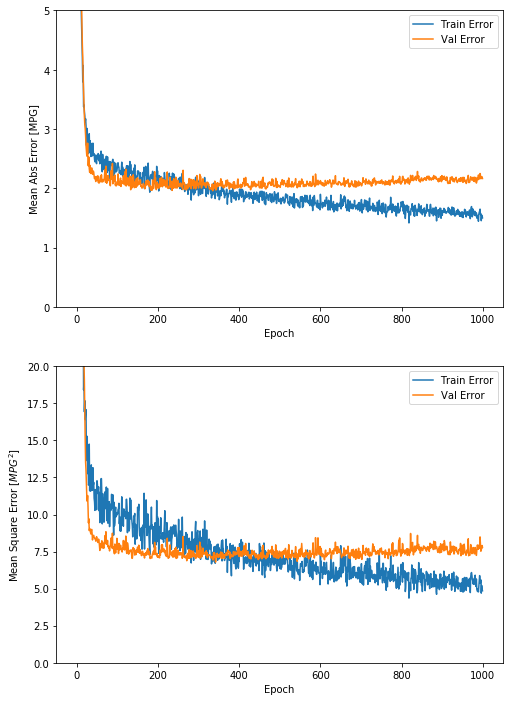

In [119]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

## 4. 최상(?)의 상태에서 훈련을 멈추고 싶다.
- 최상: Validation Loss가 가장 낮은 지점
- Train Loss가 가장 낮은 지점은?

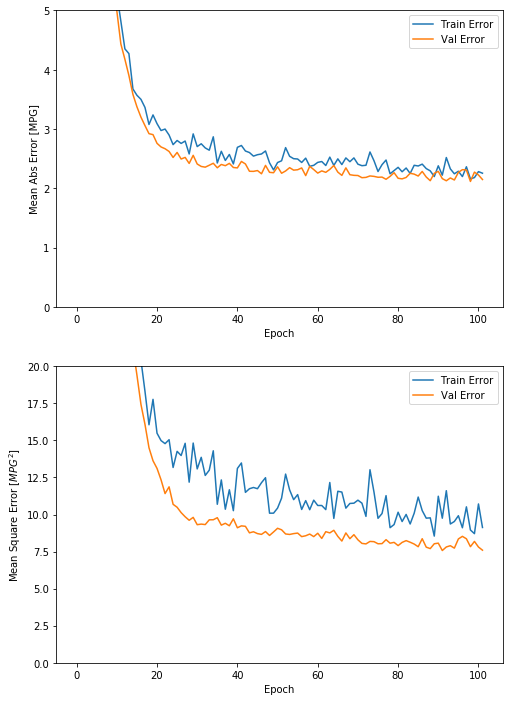

In [121]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# 10번 연속으로 val loss가 올라간다? 그 지점의 시작 Epoch에서 Stop!
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)